<a href="https://colab.research.google.com/github/RalphLynnMora/Coding-Projects/blob/main/LinearRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

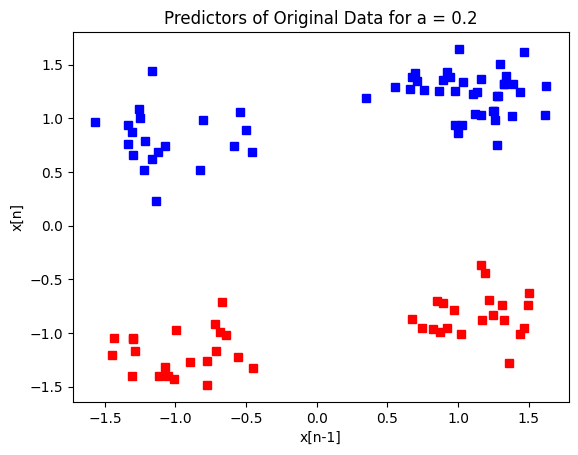

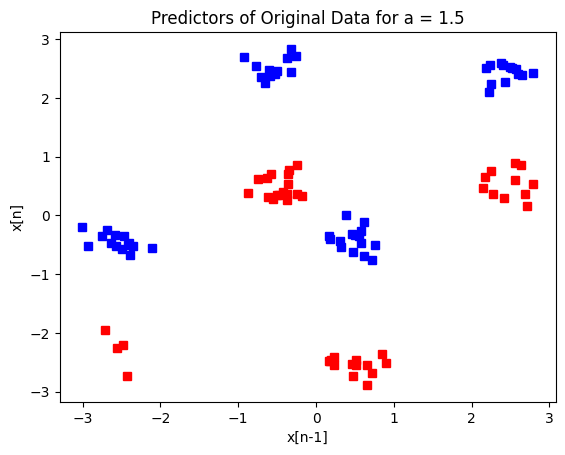

[ 1.14475497e-02 -1.36998881e-01  8.26207947e-01 -2.14546597e-03
  1.49434597e-04 -1.11118604e-04  9.79786506e-02 -1.26452826e-02
  1.22675260e-02 -3.89805964e-01]
[[ 10.43767946  10.46577196  10.49376726 ...   9.35998063   9.3358451
    9.31166756]
 [ 10.30749171  10.33552035  10.36345199 ...   9.23693519   9.21288276
    9.18878853]
 [ 10.17814617  10.20611092  10.23397886 ...   9.11471299   9.09074364
    9.06673268]
 ...
 [-12.93656674 -12.962648   -12.98868146 ... -13.9153573  -13.8849103
  -13.85436029]
 [-13.08303198 -13.10919583 -13.13531167 ... -14.0687165  -14.03820511
  -14.00759052]
 [-13.23038576 -13.25663221 -13.28283046 ... -14.2229832  -14.19240745
  -14.16172829]]


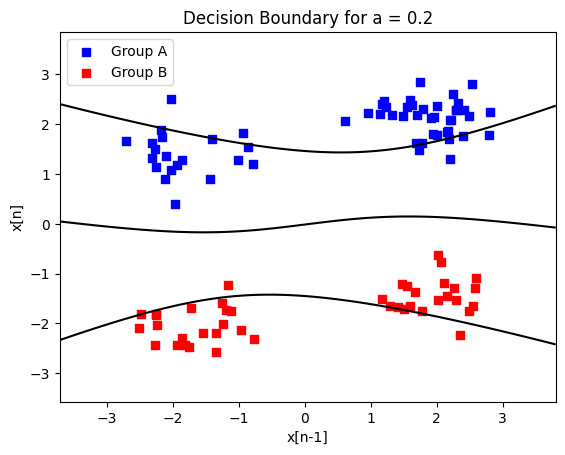

[ 1.11074773e-02  2.72513560e-01 -5.98618078e-01 -3.79057343e-03
 -5.89207132e-03 -1.26982208e-04 -4.69259795e-02  9.92498203e-02
 -1.24232176e-01  2.01949473e-01]
[[-23.73742134 -23.876125   -24.01431185 ... -32.5814747  -32.63662178
  -32.69214726]
 [-23.46968694 -23.6084518  -23.74669993 ... -32.45486434 -32.51018533
  -32.56588482]
 [-23.20280147 -23.34162732 -23.47993655 ... -32.32886451 -32.38435921
  -32.4402325 ]
 ...
 [ 33.63639896  33.56512887  33.49426399 ...  25.3683193   25.24658622
   25.12436315]
 [ 33.75054308  33.67944781  33.60875767 ...  25.6247947   25.50312373
   25.38096266]
 [ 33.86527899  33.79435874  33.72384353 ...  25.88210027  25.76049161
   25.63839276]]


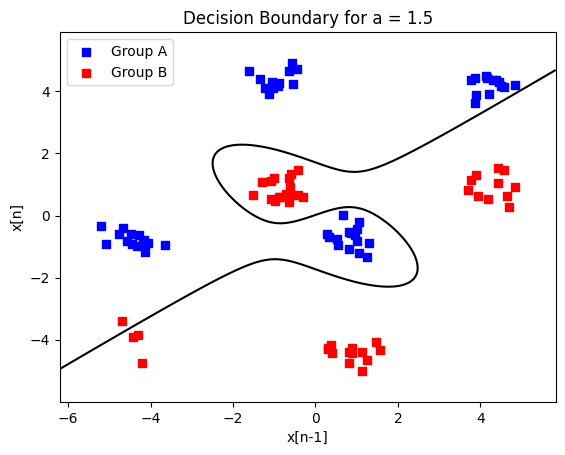

In [ ]:
import numpy as np #numerical tools
import scipy.signal as sp #signal processing tools
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import math

#Generate data
def data(N,a):
   N=N+3
   h=np.array([1,a])
   y=np.sign(np.random.randn(N,1))
   y=np.reshape(y,len(y))
   t=np.arange(N)
   z=np.convolve(h,y)
   z=z[1:N-1]
   y=y[2:N-1]
   X=np.array([z[0:N-3],z[1:N-2]])+0.2*np.random.randn(2,N-3)
   return X,y

#Plot data for a = 0.2
X1,y1=data(100,0.2)
ind1=np.where(y1==1)
ind2=np.where(y1==-1)
plt.plot(X1[0,ind1],X1[1,ind1],'bs',label = 'Group A')
plt.plot(X1[0,ind2],X1[1,ind2],'rs',label = 'Groub B')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Predictors of Original Data for a = 0.2')
plt.show()

#Plot data for a = 1.5
X2,y2=data(100,1.5)
ind1=np.where(y2==1)
ind2=np.where(y2==-1)
plt.plot(X2[0,ind1],X2[1,ind1],'bs')
plt.plot(X2[0,ind2],X2[1,ind2],'rs')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Predictors of Original Data for a = 1.5')
plt.show()

#Develop Volterra expansion to transform it
from numpy import matlib
def volterra(X):
    N = X.shape[1]
    X_hilbert = np.empty((10,N),'float')
    X_hilbert[0,:] = 1
    X_hilbert[1,:] = math.sqrt(3)*X[0,:]
    X_hilbert[2,:] = math.sqrt(3)*X[1,:]
    X_hilbert[3,:] = math.sqrt(6)*X[0,:]*X[1,:]
    X_hilbert[4,:] = math.sqrt(3)*X[0,:]**2
    X_hilbert[5,:] = math.sqrt(3)*X[1,:]**2
    X_hilbert[6,:] = math.sqrt(3)*X[1,:]**2*X[0,:]
    X_hilbert[7,:] = math.sqrt(3)*X[1,:]*X[0,:]**2
    X_hilbert[8,:] = X[0,:]**3
    X_hilbert[9,:] = X[1,:]**3
    return X_hilbert

#Transform a = 0.2 data
X_hilbert1 = volterra(X1)
# Compute the MMSE Solution with Regularization
X_hilbert1 = X_hilbert1.T
reg_constant = 1e-6
identity_matrix = np.identity(X_hilbert1.shape[1])
w_mmse1 = np.linalg.inv(X_hilbert1.T @ X_hilbert1 + reg_constant * identity_matrix) @ (X_hilbert1.T @ y1)
print(w_mmse1)

xx1, yy1 = np.meshgrid(np.arange(X_hilbert1[:, 1].min() - 1, X_hilbert1[:, 1].max() + 1, 0.01),
                     np.arange(X_hilbert1[:, 2].min() - 1, X_hilbert1[:, 2].max() + 1, 0.01))

# Decision Boundary
Z1 = w_mmse1[0] + w_mmse1[1]*xx1 + w_mmse1[2]*yy1 + w_mmse1[3]*xx1*yy1 + w_mmse1[4]*xx1**2 + w_mmse1[5]*yy1**2 + w_mmse1[6]*xx1**2*yy1 + w_mmse1[7]*yy1**2*xx1 + w_mmse1[8]*xx1**3 + w_mmse1[9]*yy1**3
print(Z1)

# Plot the Data and Decision Boundary for a = 0.2
plt.scatter(X_hilbert1[:, 1][y1 == 1], X_hilbert1[:, 2][y1 == 1], marker = 's', color = 'b', label='Group A')
plt.scatter(X_hilbert1[:, 1][y1 == -1], X_hilbert1[:, 2][y1 == -1],marker = 's', color = 'r', label='Group B')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.contour(xx1, yy1, Z1, colors='k', levels = [0], linestyles=['-'])
plt.legend(loc='best')
plt.title("Decision Boundary for a = 0.2")
plt.show()

#Transform a = 1.5 data
X_hilbert2 = volterra(X2)
# Compute the MMSE Solution with Regularization
X_hilbert2 = X_hilbert2.T
reg_constant = 1e-6
identity_matrix = np.identity(X_hilbert2.shape[1])
w_mmse2 = np.linalg.inv(X_hilbert2.T @ X_hilbert2 + reg_constant * identity_matrix) @ (X_hilbert2.T @ y2)
print(w_mmse2)
# Decision Boundary
xx2, yy2 = np.meshgrid(np.arange(X_hilbert2[:, 1].min() -1 , X_hilbert2[:, 1].max()+1, 0.01),
                     np.arange(X_hilbert2[:, 2].min()-1, X_hilbert2[:, 2].max()+1, 0.01))
Z2 = w_mmse2[0] + w_mmse2[1]*xx2 + w_mmse2[2]*yy2 + w_mmse2[3]*xx2*yy2 + w_mmse2[4]*xx2**2 + w_mmse2[5]*yy2**2 + w_mmse2[6]*xx2**2*yy2 + w_mmse2[7]*yy2**2*xx2 + w_mmse2[8]*xx2**3 + w_mmse2[9]*yy2**3
print(Z2)

# Plot the Data and Decision Boundary for a =1.5
plt.scatter(X_hilbert2[:, 1][y2 == 1], X_hilbert2[:, 2][y2 == 1], marker = 's', color = 'b', label='Group A')
plt.scatter(X_hilbert2[:, 1][y2 == -1], X_hilbert2[:, 2][y2 == -1],marker = 's', color = 'r', label='Group B')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.contour(xx2, yy2, Z2, colors='k', levels=[0], linestyles=['-'])
plt.legend(loc='best')
plt.title("Decision Boundary for a = 1.5")
plt.show()





X:
[[ 1.35892728 -0.82998549]
 [-0.60850771  1.08334695]
 [ 0.76995042  1.32234533]
 [ 1.17022097  1.24015213]
 [ 0.77336333 -0.81129889]
 [-0.61944702 -0.92109317]
 [-1.2529002  -1.081719  ]
 [-1.55719471 -0.80066196]
 [-1.04274883  0.78593801]
 [ 0.71761643  0.88051633]
 [ 0.97554193  1.493337  ]
 [ 1.19192467 -0.99974422]
 [-0.92084162 -1.3198915 ]
 [-0.84186515  0.6748735 ]
 [ 0.83119677 -0.83395377]
 [-1.02104996 -1.21335764]
 [-1.32672999  0.73135948]
 [ 0.86476357 -0.72112155]
 [-0.7944968   0.90287315]
 [ 0.63580924  1.13900619]
 [ 1.38227382 -0.89401887]
 [-1.00904219 -1.4568761 ]
 [-1.39017386  0.57904739]
 [ 0.78958442 -0.8824507 ]
 [-0.46043653  0.96362959]
 [ 1.18462042  1.68228798]
 [ 1.24605636  1.06504692]
 [ 1.14721441 -0.81996595]
 [-0.81990553  0.93270213]
 [ 0.47580783  1.11287741]
 [ 1.34974431 -0.84204927]
 [-1.44491693 -1.38668747]
 [-1.46498192  1.16049039]
 [ 0.74530013  1.33808918]
 [ 1.19690663 -0.65963154]
 [-0.59758786 -1.18269371]
 [-0.82874006  1.01494269

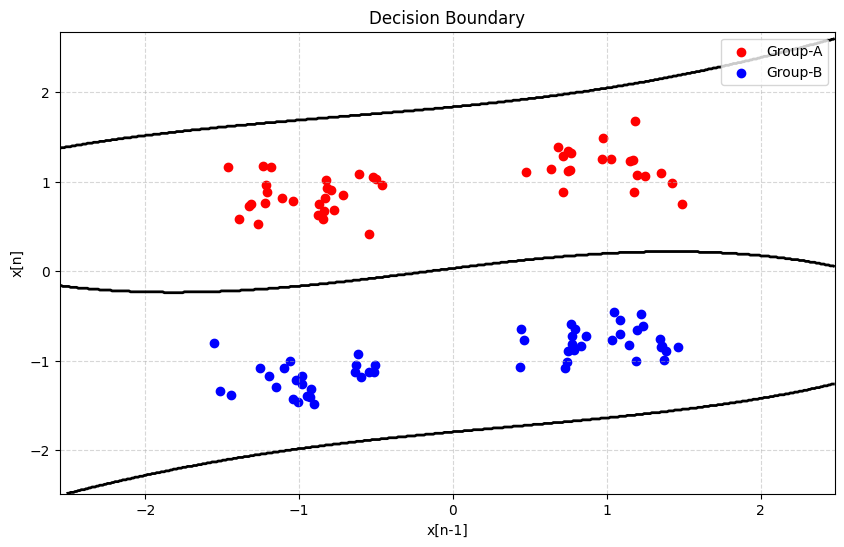

KeyboardInterrupt: ignored

In [ ]:
# importing all the important libraries.
import numpy as np
import matplotlib.pyplot as plt

# Funtion to generate dataset
def data(N, a):
    N = N + 3
    h = np.array([1, a])
    y = np.sign(np.random.randn(N))
    t = np.arange(N)
    z = np.convolve(h, y)
    z = z[1:N-1]
    y = y[2:N-1]
    X = np.array([z[0:N-3], z[1:N-2]]).T
    X = X + 0.2 * np.random.randn(N-3, 2)
    return X, y

# visulaization of data.
X_train, y_train = data(100, 0.2)
print("X:")
print(X_train)
print("\ny:")
print(y_train)


# This block contains all the funtion required to be create in the task.
# Polynomial kernel k(x_i, x_j) = (x_i^T x_j + 1)^3
def polynomial_kernel(X1, X2):
    return (np.dot(X1, X2.T) + 1) ** 3
# Compute the kernel matrix with the polynomial kernel
K_train = polynomial_kernel(X_train, X_train)

# Regularization constant and identity matrix
reg_constant = 1e-6
identity_matrix = np.identity(K_train.shape[0])
# Calculate the dual weights (alpha values)
alpha = np.linalg.solve(K_train + reg_constant * identity_matrix, y_train)
# Create a mesh grid for plotting
xx, yy = np.meshgrid(np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.01),
                     np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.01))
X_test = np.c_[xx.ravel(), yy.ravel()]
# Dual form estimator function with the polynomial kernel
def dual_estimator(X_test, X_train, alpha):
    kernel_values = polynomial_kernel(X_test, X_train)
    return np.sign(np.dot(kernel_values, alpha))


# Plot the Decision Boundary
Z = dual_estimator(X_test, X_train, alpha)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], marker='o', color='r', label='Group-A')
plt.scatter(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], marker='o', color='b', label='Group-B')
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'], linewidths=[2])
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.legend(loc='best')
plt.title("Decision Boundary")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Ridge Regression solution, this is α=〖(Κ+ΥI)〗^(-1) y
# Compute the kernel matrix
def compute_kernel_matrix(X, kernel_func):
    N = X.shape[0]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kernel_func(X[i], X[j])
    return K

# Compute the dual weights using Ridge Regression
def compute_dual_weights(K, y, reg_param):
    identity_matrix = np.identity(K.shape[0])
    alpha = np.linalg.solve(K + reg_param * identity_matrix, y)
    return alpha

# Dual form estimator function
def dual_estimator(X_test, X_train, alpha, kernel_func):
    kernel_values = np.array([[kernel_func(X_test[i], X_train[j]) for j in range(X_train.shape[0])]
                              for i in range(X_test.shape[0])])
    return np.sign(np.dot(kernel_values, alpha))


# Plot the Decision Boundary
def plot_decision_boundary(X_train, y_train, X_test, alpha, kernel_func):
    Z = dual_estimator(X_test, X_train, alpha, kernel_func)
    Z = Z.reshape(X_test[:, 0].shape)

    xx, yy = np.meshgrid(np.arange(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1, 0.01),
                         np.arange(X_test[:, 1].min() - 1, X_test[:, 1].max() + 1, 0.01))

    Z = dual_estimator(np.c_[xx.ravel(), yy.ravel()], X_train, alpha, kernel_func)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], marker='o', color='r', label='Group-A')
    plt.scatter(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], marker='o', color='b', label='Group-B')
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'], linewidths=[2])
    plt.xlabel('x[n-1]')
    plt.ylabel('x[n]')
    plt.legend(loc='best')
    plt.title("Decision Boundary")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

X_test = X_train
# Compute the polynomial kernel matrix
K = compute_kernel_matrix(X_train, polynomial_kernel)

# Result for different values of the parameter that are able to produce different solutions
reg_param_values = [1e-6, 1e-3, 1.0]
for reg_param in reg_param_values:
    alpha = compute_dual_weights(K, y_train, reg_param)
    plot_decision_boundary(X_train, y_train, X_test, alpha, polynomial_kernel)